# The Sparks Foundation

## Task6 - Prediction using Decision Tree Algorithm
- Create the Decision Tree classiﬁer and visualize it graphically. 
- The purpose is if we feed any new data to this  classiﬁer, it would be able to predict the right class accordingly. 
- Data can be found at  https://bit.ly/3kXTdox -> save as **Iris.csv** 

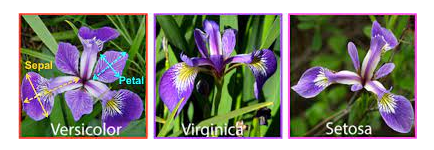

### Importing the libraries

In [385]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree

### Loading the dataset

In [386]:
df = pd.read_csv("Iris.csv", low_memory=False)

### Checking the data

In [387]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [388]:
# The column Id in this analysis is not relevant, so I will drop it
df.drop(columns='Id',inplace=True)

In [389]:
df.shape

(150, 5)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [391]:
# % of columns without values
df.isna().sum() / len(df) * 100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

- The dataset has NO Null values

### Iris plant has 3 classes:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

With the following attributes:
- sepal length 
- sepal width 
- petal length 
- petal width

In [392]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


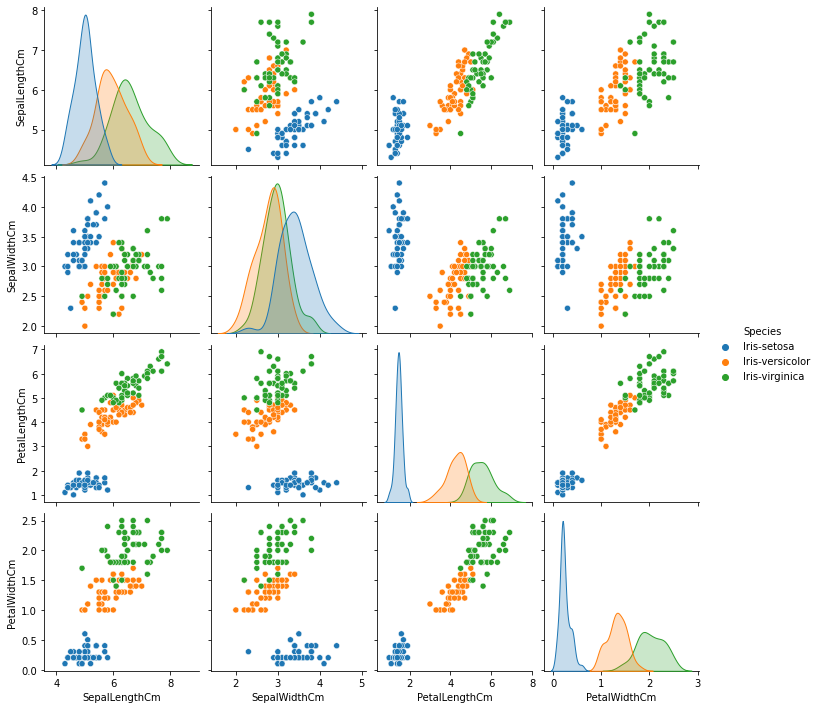

In [393]:
sns.pairplot(df, hue="Species")
plt.show()

### Using Decision Tree Algorithm
Decision Tree algorithm belongs to the family of supervised learning algorithms and it can be used for solving regression and classification problems too.

### Extracting the data attributes(X) and corresponding labels(y)

In [394]:
# extract features/attributes
X = df.drop('Species', axis=1)

# extract classes
y = df['Species']

# checking the shape 
print(X.shape, y.shape)

(150, 4) (150,)


### After extracted the data attributes and corresponding labels, we will split them to train and test datasets using the function train_test_split from the library:
- sklearn.model_selection

In [395]:
le = LabelEncoder()
y = le.fit_transform(y)

In [396]:
# test_size -> 25% of total dataset will be split, where 75% will assign as train data
# In this case we have 150 rows in our dataset, we will use 112 as train data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

### **Training the model**
#### Now we use the classification importing DecisionTreeClassifier function from sklearn library

In [397]:
# If we use the parameter min_samples_leaf=10 to create our leaves with at least 10 samples
classifier = DecisionTreeClassifier() 
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### **Prediction**

In [398]:
y_pred = classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred)
y_test = le.inverse_transform(y_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [399]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion_Matrix is: \n", cm)
ac = accuracy_score(y_test,y_pred)
print("Accuracy_Score is:", ac)

Confusion_Matrix is: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy_Score is: 0.9736842105263158


### **Visualisation**

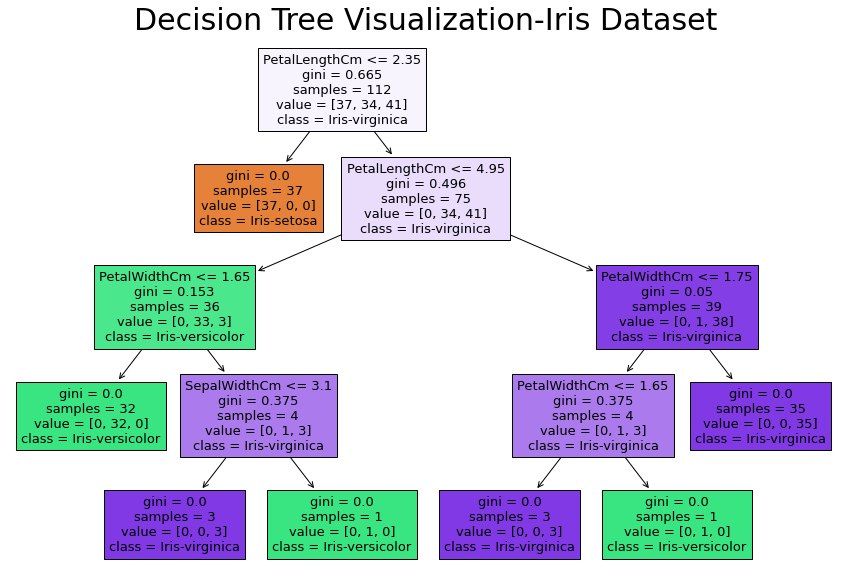

In [401]:
plt.figure(figsize=(15,10))
dot_data = tree.plot_tree(classifier, 
                                feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                                filled=True)
plt.title("Decision Tree Visualization-Iris Dataset",fontsize=30)
plt.show()